# Prova 2 de Física Computacional
Aluno: Wagner Martins de Lima Filho

In [355]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Problema 1

### a) Faça um gráfico do número de manchas solares observadas entre 1940 e 2021.

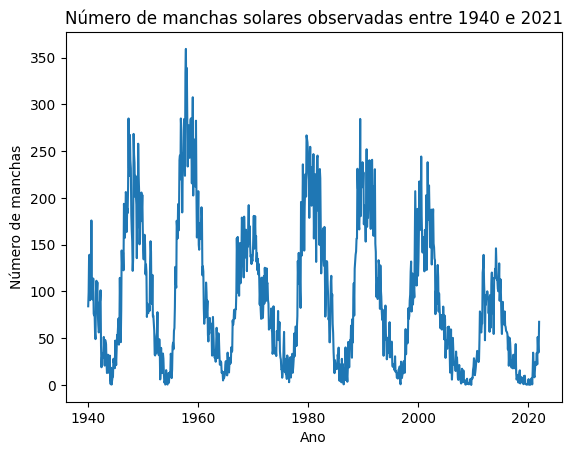

In [356]:
df = np.loadtxt('./manchas_solares.dat')
df = df[df[:,2] >= 1940]
frac_ano = df[:, 2]
n_manchas = df[:, 3]

plt.plot(frac_ano, n_manchas)
plt.ylabel('Número de manchas')
plt.xlabel('Ano')
plt.title('Número de manchas solares observadas entre 1940 e 2021')
plt.show()

### b) Calcule a transformada de Fourier dos dados usados e faça o gráfico do quadrado do módulo dos coeficientes de Fourier, $|c_k|^2$, em função do período T.

(0.0, 400.0)

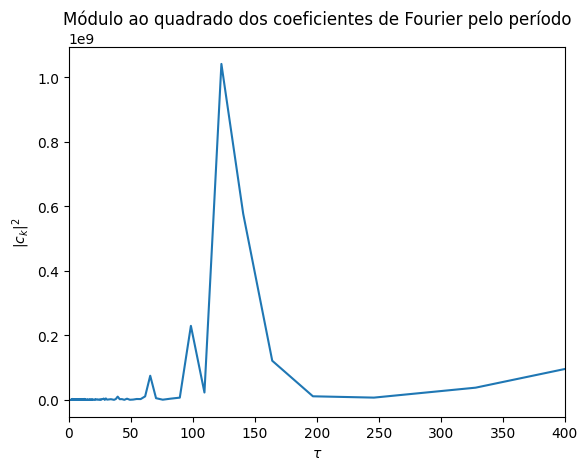

In [357]:
n_manchas_fft = np.fft.rfft(n_manchas)[1:]
n_manchas_fft = np.power(np.absolute(n_manchas_fft), 2)

N = n_manchas.size

periodo = 1/(np.fft.rfftfreq(N, 1)[1:])

plt.plot(periodo, n_manchas_fft)
plt.xlim([0,400])
plt.title(r'Módulo ao quadrado dos coeficientes de Fourier pelo período')
plt.ylabel(r'$|c_k|^2$')
plt.xlabel(r'$\tau$')
plt.xlim([0,400])

### c) Encontre o período $T$ que corresponde ao pico do gráfico anterior, e determine o esse período em anos.

In [358]:
ind = np.argmax(n_manchas_fft)
print(f'O ciclo solar é de {round(periodo[ind])} meses, ou {round(periodo[ind]/12,2)} anos')

ciclo_solar = periodo[ind]/12


O ciclo solar é de 123 meses, ou 10.25 anos


### d) Com base nos seus resultados, estime quando (mês e ano) ocorrerá o próximo valor máximo solar, ou seja, quando o número de manchas voltará a ter um pico.

Para isso, podemos pegar o maior valor dos ultimos 10.25 anos que teremos certeza que obedecerá a um ciclo e tendo em vista o mais recente, acrescentamos e procuramos o valor que responde a questão.

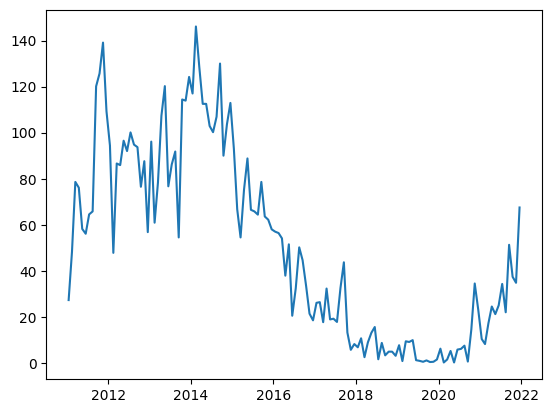

In [359]:
df = df[df[:,2] > 2011]
frac_ano = df[:,2]
n_manchas = df[:,3]

plt.plot(frac_ano, n_manchas)

Podemos ver que o maior numero de manchas ocorreu em 2014, portanto, tomaremos 10.25 anos somado a data do ocorrido

In [360]:
max_ciclo = np.argmax(n_manchas)
estimativa = frac_ano[max_ciclo] + ciclo_solar
mes = (estimativa%1)*12

print(f'Estimativa para mês {round(mes)} de {round(estimativa)}')

Estimativa para mês 4 de 2024


Ou seja o próximo pico de atividade solar é estimado para abril de 2024.

## Problema 2

A Lei de Hubble pode ser definida por:

$$
v = H_0d
$$

$v$: Velocidade de recessão da galáxia

$d$: Distância da galáxia

$H_0$: Constante de Hubble

### a) Utilizando o método `curve_fit()`, faça um ajuste de uma reta aos dados do arquivo. Depois faça um gráfico mostrando os dados e a reta ajustada.

Text(0, 0.5, 'Velocidade (km/s)')

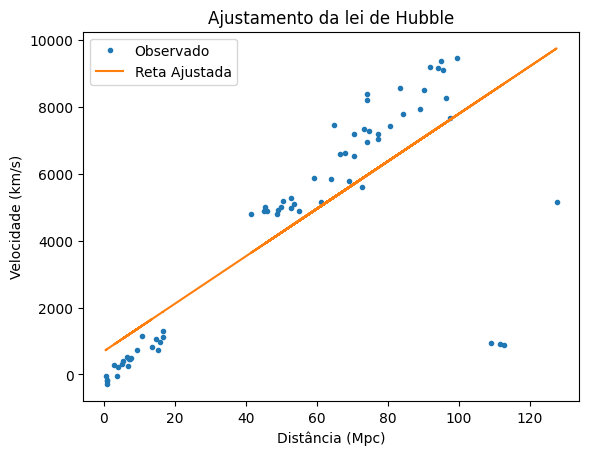

In [361]:
df = np.loadtxt('./dados_galaxias.dat')
dist = df[:,0]
vel = df[:,1]

f = lambda a,x,b: a*x+b

[[a,b], m] = curve_fit(f, dist, vel)

est_f = lambda x: a*x+b

plt.plot(dist, vel, '.')
plt.plot(dist, est_f(dist))
plt.title('Ajustamento da lei de Hubble')
plt.legend(['Observado', 'Reta Ajustada'])
plt.xlabel(r'Distância (Mpc)')
plt.ylabel(r'Velocidade (km/s)')


### b) Determine o valor de $H_0$ em $s^{-1}$

In [362]:
H0 = a / 3.086e19
print(H0,'s^-1')

2.298884964472235e-18 s^-1


### c) A idade do universo pode ser estimada como $t=\frac{1}{H_0}$. Com o valor $H_0$ que você obteve, estime a idade do universo em bilhões de anos

In [363]:
idade_seg = 1/H0
conv = 1e9*365*24*60*60
idade_bilhoes_anos = idade_seg/conv
print(f'A idade do universo é estimada em {round(idade_bilhoes_anos,2)} bilhões de anos')

A idade do universo é estimada em 13.79 bilhões de anos
